# 1. Kết nối tới drive , import một số thư viện cần thiết

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm

from datetime import datetime
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.utils import column_or_1d

In [3]:
VNP = pd.read_csv("/content/drive/MyDrive/DAB Final Project/Source Code/Dataset/VNP.csv")

In [4]:
VNP

,Date,Price,Open,High,Low,Vol.,Change %
0,12/1/2017,5100,5200,5200,4900,42.50K,-1.92%
1,12/4/2017,5800,5100,5800,5100,574.50K,13.73%
2,12/5/2017,5700,6000,6000,5600,218.50K,-1.72%
3,12/6/2017,5800,5800,5800,5700,176.41K,1.75%
4,12/7/2017,6300,5800,6400,5600,307.82K,8.62%
...,...,...,...,...,...,...,...
1225,6/5/2023,14700,15500,15500,14700,18.00K,-0.68%
1226,6/6/2023,14900,14600,14900,14600,1.80K,1.36%
1227,6/7/2023,14800,14800,15500,14600,10.02K,-0.67%
1228,6/8/2023,14400,14900,14900,14300,8.80K,-2.70%


# 2. Tiền xử lý dữ liệu

### Loại bỏ một số dữ liệu trống trong dataset

In [5]:
# Drop missing values
VNP = VNP.dropna()
# Reset the index
VNP = VNP.reset_index(drop=True)

### Chuyển dữ liệu cột Price sang dạng float

In [6]:
VNP["Price"]=VNP["Price"].astype(float)

# 3. Trực quan hóa tập dữ liệu ban đầu bằng biểu đồ

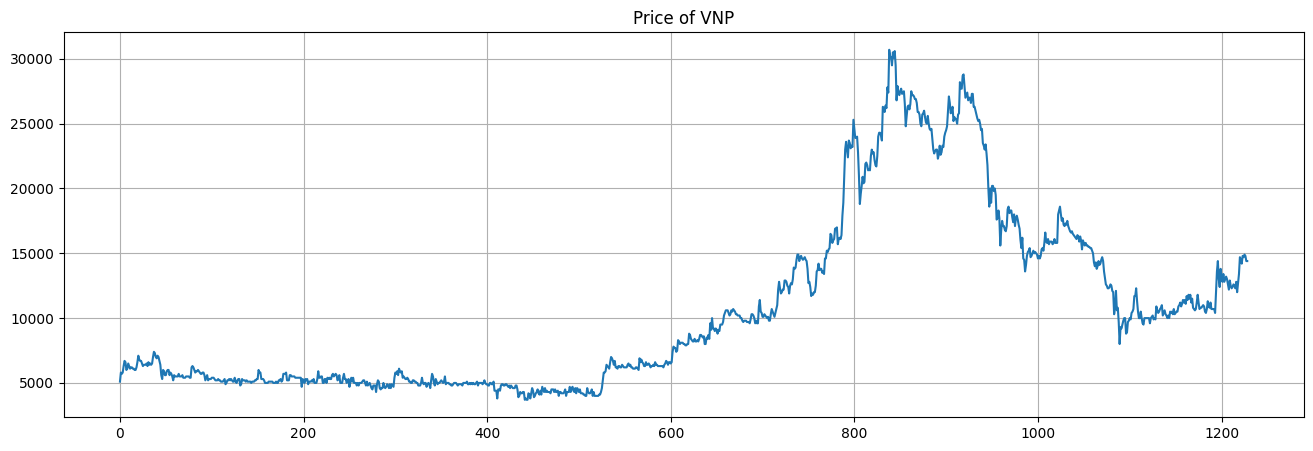

In [7]:
# Illustrated representation of Close Stock Price
plt.figure(figsize=(16,5))
plt.plot(VNP["Price"])
plt.title('Price of VNP')
plt.grid(True)
plt.show()

# 4. Chia tập dữ liệu để train-test-validate theo tỉ lệ 7:2:1

In [8]:
# Split the data into training, testing, and validation sets
train_size = int(0.7 * len(VNP))
test_size = int(0.2 * len(VNP))
val_size = len(VNP) - train_size - test_size

In [9]:
train_data = VNP[:train_size]
test_data = VNP[train_size:train_size+test_size]
val_data = VNP[train_size+test_size:]

<h1> Quá trình training

In [10]:
#Training data
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

<h1> Quá trình testing

In [11]:
# Testing data
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(x_test)

<h1>Quá trình validate

In [12]:
#Validate data
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Price'])
y_pred_val =  model.predict(x_val)

<h1>Quá trình dự đoán giá cổ phiếu trong 30 ngày tiếp theo

In [13]:
#Tạo index cho 30 ngày tiếp theo
last_index =  VNP.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

#Tạo một mảng gồm 30 số nguyên liên tiếp bắt đầu từ last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

#Dự đoán giá đóng cửa của cổ phiếu trong 30 ngày tiếp theo
y_next_30_days = model.predict(x_next_30_days)

print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[20931.95885659 20947.9378618  20963.91686702 20979.89587224
 20995.87487745 21011.85388267 21027.83288788 21043.8118931
 21059.79089832 21075.76990353 21091.74890875 21107.72791397
 21123.70691918 21139.6859244  21155.66492962 21171.64393483
 21187.62294005 21203.60194527 21219.58095048 21235.5599557
 21251.53896091 21267.51796613 21283.49697135 21299.47597656
 21315.45498178 21331.433987   21347.41299221 21363.39199743
 21379.37100265 21395.35000786]


<h1>Đánh giá độ chính xác của thuật toán

In [14]:
#RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

Validation RMSE: 8576.657010434537
Testing RMSE: 6705.411329134205


In [15]:
#MAE
valid_mae = mean_absolute_error(y_val,y_pred_val)
test_mae = mean_absolute_error(y_test, y_pred)
print('Validation MAE:', valid_mae)
print('Testing MAE:', test_mae)

Validation MAE: 8520.367804752319
Testing MAE: 5425.252541491729


In [16]:
#MAPE
valid_mape = np.mean(np.abs((y_val - y_pred_val) / y_val))*100
test_mape = np.mean(np.abs((y_test - y_pred) / y_test))*100
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

Validation MAPE: 76.50207327610474
Testing MAPE: 29.644476710381294


<h1>Vẽ hình mô tả dự đoán

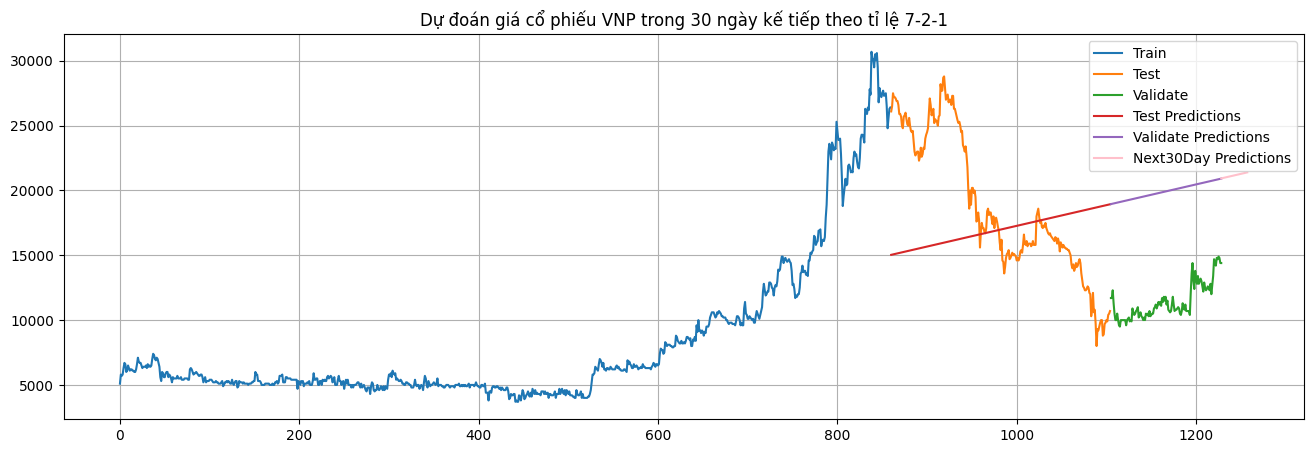

In [17]:
#Drawing plot
plt.figure(figsize=(16,5))
plt.title("Dự đoán giá cổ phiếu VNP trong 30 ngày kế tiếp theo tỉ lệ 7-2-1")
plt.grid(True)
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(val_data.index, val_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days, color ="pink")
plt.legend(['Train', 'Test', 'Validate','Test Predictions','Validate Predictions','Next30Day Predictions'])
plt.show()

# 5. Chia tập dữ liệu để train-test-validate theo tỉ lệ 6:3:1

In [18]:
# Split the data into training, testing, and validation sets
train_size = int(0.6 * len(VNP))
test_size = int(0.3 * len(VNP))
val_size = len(VNP) - train_size - test_size

In [19]:
train_data = VNP[:train_size]
test_data = VNP[train_size:train_size+test_size]
val_data = VNP[train_size+test_size:]

<h1>Quá trình training

In [20]:
#Training data
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

<h1>Quá trình testing

In [21]:
# Testing data
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(x_test)

<h1>Quá trình validate

In [22]:
#Validate data
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Price'])
y_pred_val =  model.predict(x_val)

<h1>Quá trình dự đoán giá cổ phiếu trong 30 ngày tiếp theo

In [23]:
#Tạo index cho 30 ngày tiếp theo
last_index =  VNP.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

#Tạo một mảng gồm 30 số nguyên liên tiếp bắt đầu từ last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

#Dự đoán giá đóng cửa của cổ phiếu trong 30 ngày tiếp theo
y_next_30_days = model.predict(x_next_30_days)

print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[10670.3734293  10675.66793431 10680.96243932 10686.25694433
 10691.55144935 10696.84595436 10702.14045937 10707.43496439
 10712.7294694  10718.02397441 10723.31847942 10728.61298444
 10733.90748945 10739.20199446 10744.49649948 10749.79100449
 10755.0855095  10760.38001451 10765.67451953 10770.96902454
 10776.26352955 10781.55803456 10786.85253958 10792.14704459
 10797.4415496  10802.73605462 10808.03055963 10813.32506464
 10818.61956965 10823.91407467]


<h1>Đánh giá độ chính xác của thuật toán

In [24]:
#RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

Validation RMSE: 1625.8334071730278
Testing RMSE: 11786.683702847207


In [25]:
#MAE
valid_mae = mean_absolute_error(y_val,y_pred_val)
test_mae = mean_absolute_error(y_test, y_pred)
print('Validation MAE:', valid_mae)
print('Testing MAE:', test_mae)

Validation MAE: 1128.8681397483247
Testing MAE: 10320.925757244191


In [26]:
#MAPE
valid_mape = np.mean(np.abs((y_val - y_pred_val) / y_val))*100
test_mape = np.mean(np.abs((y_test - y_pred) / y_test))*100
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

Validation MAPE: 8.930433034896687
Testing MAPE: 48.9155579044652


<h1>Vẽ hình mô tả dự đoán

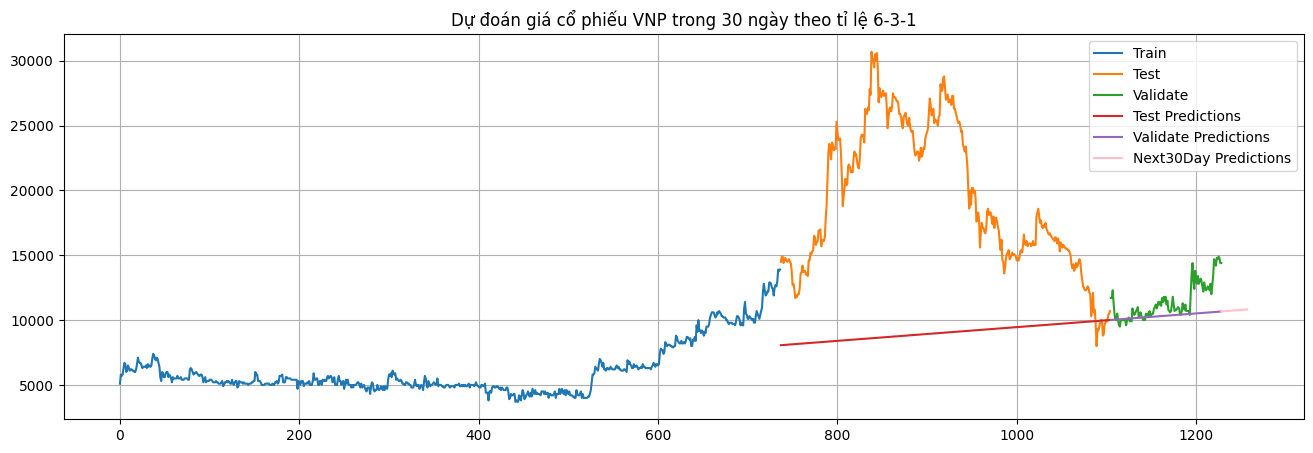

In [27]:
#Drawing plot
plt.figure(figsize=(16,5))
plt.grid(True)
plt.title("Dự đoán giá cổ phiếu VNP trong 30 ngày theo tỉ lệ 6-3-1")
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(val_data.index, val_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days, color="pink")
plt.legend(['Train', 'Test','Validate', 'Test Predictions','Validate Predictions','Next30Day Predictions'])
plt.show()

# 6. Chia tập dữ liệu để train-test-validate theo tỉ lệ 5:3:2

In [28]:
# Split the data into training, testing, and validation sets
train_size = int(0.5 * len(VNP))
test_size = int(0.3 * len(VNP))
val_size = len(VNP) - train_size - test_size

In [29]:
train_data = VNP[:train_size]
test_data = VNP[train_size:train_size+test_size]
val_data = VNP[train_size+test_size:]

<h1> Quá trình training

In [30]:
#Training data
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

<h1> Quá trình testing

In [31]:
# Testing data
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(x_test)

<h1>Quá trình validate

In [32]:
#Validate data
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Price'])
y_pred_val =  model.predict(x_val)

<h1>Quá trình dự đoán giá cổ phiếu trong 30 ngày tiếp theo

In [33]:
#Tạo index cho 30 ngày tiếp theo
last_index =  VNP.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

#Tạo một mảng gồm 30 số nguyên liên tiếp bắt đầu từ last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

#Dự đoán giá đóng cửa của cổ phiếu trong 30 ngày tiếp theo
y_next_30_days = model.predict(x_next_30_days)

print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[4970.1898603  4969.80744913 4969.42503795 4969.04262678 4968.6602156
 4968.27780443 4967.89539325 4967.51298208 4967.1305709  4966.74815973
 4966.36574855 4965.98333737 4965.6009262  4965.21851502 4964.83610385
 4964.45369267 4964.0712815  4963.68887032 4963.30645915 4962.92404797
 4962.5416368  4962.15922562 4961.77681445 4961.39440327 4961.0119921
 4960.62958092 4960.24716975 4959.86475857 4959.4823474  4959.09993622]


<h1>Đánh giá độ chính xác của thuật toán

In [34]:
#RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

Validation RMSE: 8244.62917030234
Testing RMSE: 14498.939078222209


In [35]:
#MAE
valid_mae = mean_absolute_error(y_val,y_pred_val)
test_mae = mean_absolute_error(y_test, y_pred)
print('Validation MAE:', valid_mae)
print('Testing MAE:', test_mae)

Validation MAE: 7869.435688392353
Testing MAE: 12740.071456749964


In [36]:
#MAPE
valid_mape = np.mean(np.abs((y_val - y_pred_val) / y_val))*100
test_mape = np.mean(np.abs((y_test - y_pred) / y_test))*100
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

Validation MAPE: 59.638998140287214
Testing MAPE: 65.84645368971242


<h1>Vẽ hình mô tả dự đoán

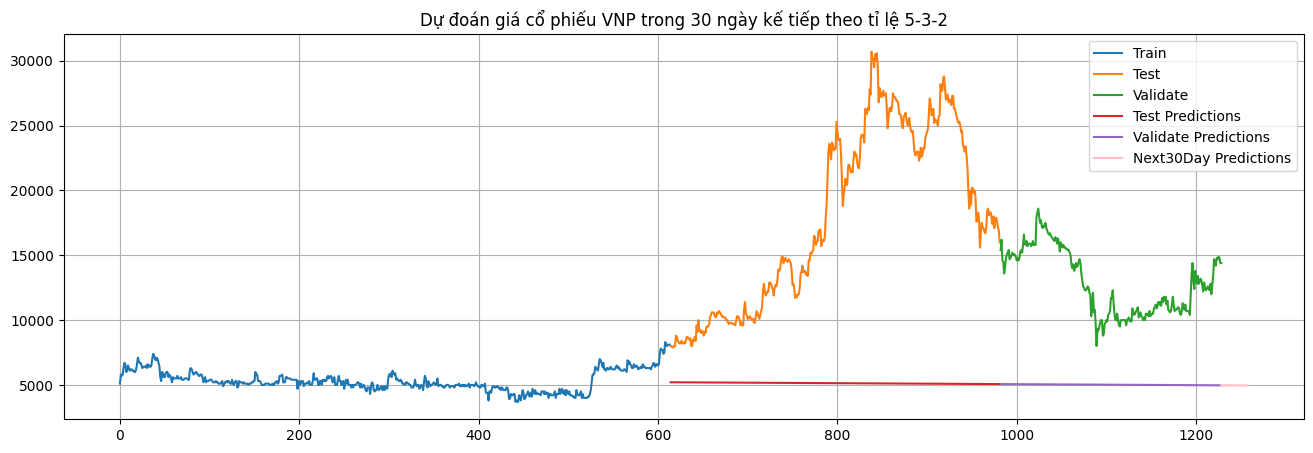

In [37]:
#Drawing plot
plt.figure(figsize=(16,5))
plt.title("Dự đoán giá cổ phiếu VNP trong 30 ngày kế tiếp theo tỉ lệ 5-3-2")
plt.grid(True)
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(val_data.index, val_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days, color ="pink")
plt.legend(['Train', 'Test', 'Validate','Test Predictions','Validate Predictions','Next30Day Predictions'])
plt.show()